# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript
ali,"Ladies and gentlemen, please welcome to the st..."
anthony,"Thank you. Thank you. Thank you,San Francisco...."
bill,"[cheers and applause] All right, thank you! Th..."
bo,"[woman on TV] That has been, really, a difficu..."
chad,"Guys, I’m telling you, this is it. This is, th..."
dave,This is Dave.He tells dirty jokes for a living...
deon,Deon Cole: Cole Hearted (2019)Genre:Stand-up C...
fern,"[electricity buzzes] Ladies and gentlemen, wel..."
hasan,"On this episode of Patriot Act, Hasan breaks d..."
jamie,[siren wailing] [somber music playing] [Harvey...


In [3]:
#!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   ------------- -------------------------- 204.8/624.3 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------  614.4/624.3 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 4.9 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

#polarity is sentiment which ranges from -1 to 1 where -1 is negative and 1 is positive
#subjectivity is how factual it is and it ranges from 0 to 1 where 0 is the most factual

,transcript,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",0.074175,0.483667
anthony,"Thank you. Thank you. Thank you,San Francisco....",0.068921,0.554588
bill,"[cheers and applause] All right, thank you! Th...",0.019251,0.537044
bo,"[woman on TV] That has been, really, a difficu...",0.075324,0.543533
chad,"Guys, I’m telling you, this is it. This is, th...",0.118828,0.510854
dave,This is Dave.He tells dirty jokes for a living...,0.002644,0.513898
deon,Deon Cole: Cole Hearted (2019)Genre:Stand-up C...,0.068794,0.511943
fern,"[electricity buzzes] Ladies and gentlemen, wel...",0.083255,0.514448
hasan,"On this episode of Patriot Act, Hasan breaks d...",0.062036,0.482280
jamie,[siren wailing] [somber music playing] [Harvey...,0.081040,0.506872


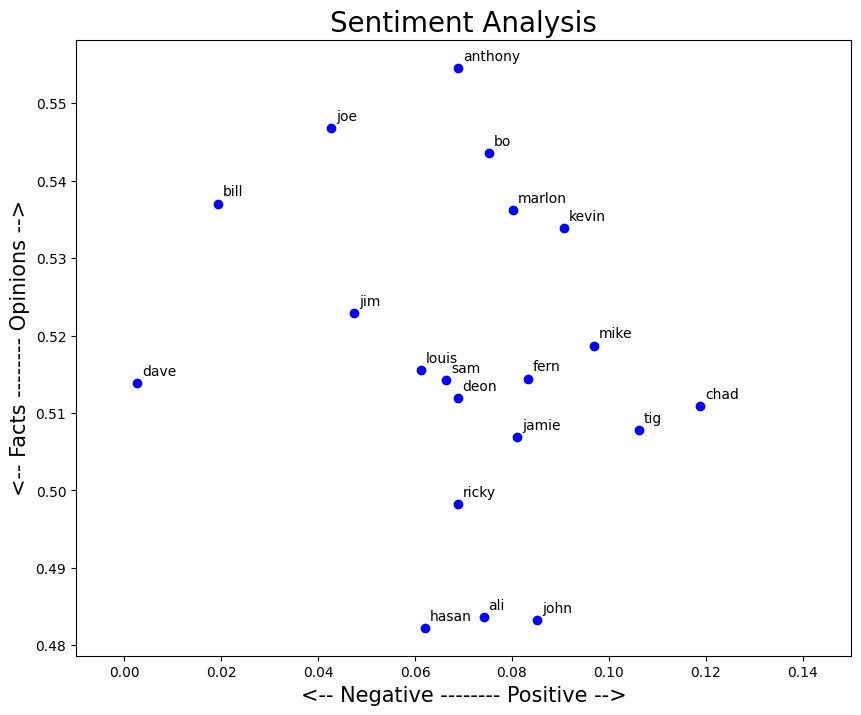

In [8]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001,comedian, fontsize=10)
    plt.xlim(-.01, .15) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

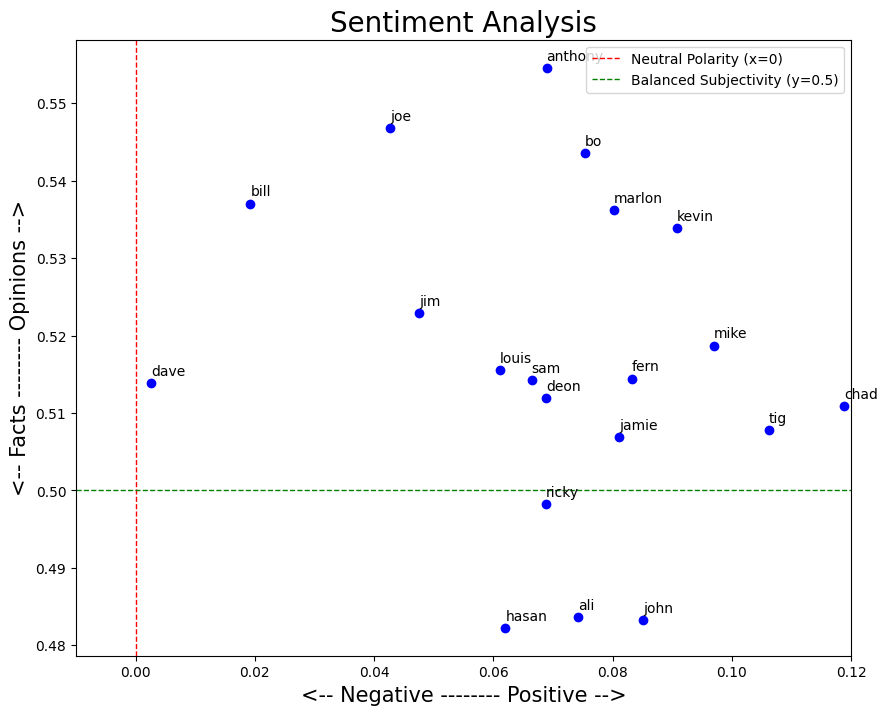

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x - 0.00, y + 0.001, comedian, fontsize=10)

# Add reference lines
plt.axvline(0, color='red', linestyle='--', linewidth=1, label='Neutral Polarity (x=0)')
plt.axhline(0.5, color='green', linestyle='--', linewidth=1, label='Balanced Subjectivity (y=0.5)')

plt.xlim(-0.01, 0.12)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.legend()
plt.show()


## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [25]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [26]:
# Let's take a look at our data again
data

,transcript,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",0.074175,0.483667
anthony,"Thank you. Thank you. Thank you,San Francisco....",0.068921,0.554588
bill,"[cheers and applause] All right, thank you! Th...",0.019251,0.537044
bo,"[woman on TV] That has been, really, a difficu...",0.075324,0.543533
chad,"Guys, I’m telling you, this is it. This is, th...",0.118828,0.510854
dave,This is Dave.He tells dirty jokes for a living...,0.002644,0.513898
deon,Deon Cole: Cole Hearted (2019)Genre:Stand-up C...,0.068794,0.511943
fern,"[electricity buzzes] Ladies and gentlemen, wel...",0.083255,0.514448
hasan,"On this episode of Patriot Act, Hasan breaks d...",0.062036,0.482280
jamie,[siren wailing] [somber music playing] [Harvey...,0.081040,0.506872


In [27]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage:Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of theirmetabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautifulinner thigh clearancewhere they put their feet together and there’s that huge gap here with the light of potential just radiating through. And then, when they go to sleep, they just go to slee

In [28]:
# The list has 10 elements, one for each transcript
len(list_pieces)

20

In [29]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [30]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.09981732348111656,
  0.06552016302016303,
  0.07725926745813111,
  0.1006959141681364,
  -0.04283251231527094,
  0.15455136386552884,
  0.03876003930280245,
  0.10911483641075477,
  0.02980410949690611,
  0.1118119975262832],
 [0.15281289660807737,
  -0.08958616010854818,
  -0.0015873015873016042,
  0.04750982042648711,
  0.11804909435506451,
  0.14600080710250202,
  0.10805714285714287,
  -0.05878659611992945,
  0.04389284550574873,
  0.1668410293410293],
 [-0.032260689190037016,
  0.003301963736746346,
  0.034607923255882446,
  0.01535470779220778,
  -0.046846896089320335,
  0.0998333136885117,
  0.021753777268483137,
  -0.03473550878684808,
  -0.013275920297196896,
  0.12420962875508333],
 [-0.021607602024965797,
  0.029204667329667335,
  0.0024234320429972586,
  -0.019661172161172157,
  0.23747919536271808,
  0.013481402511253253,
  0.07392183288409705,
  0.026624147727272715,
  0.04552989074417645,
  0.2403023006955593],
 [0.16380929834054841,
  0.11342442279942279,
  0.117816

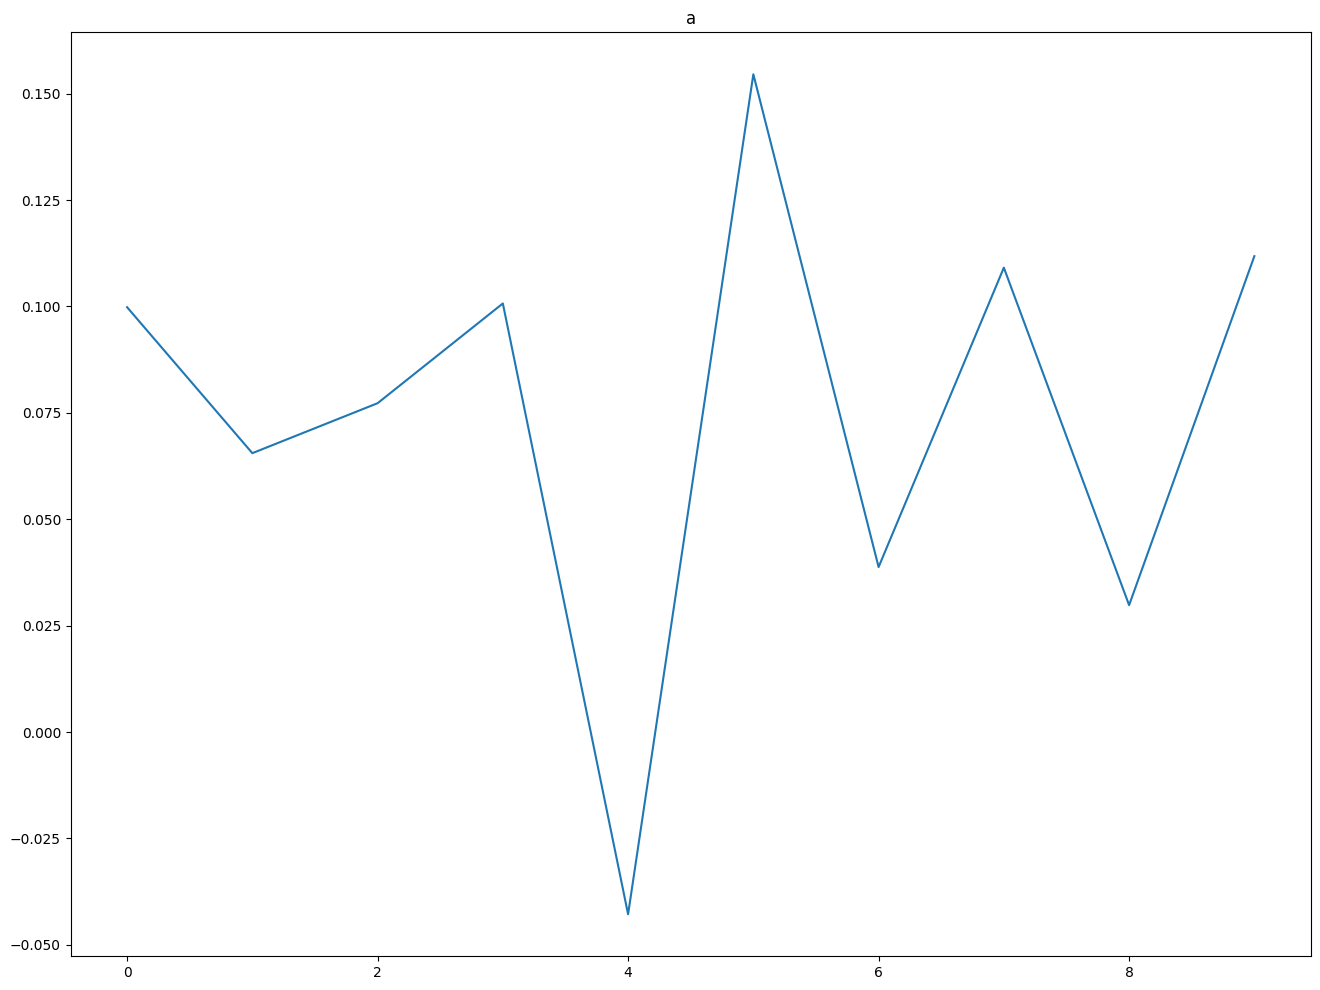

In [31]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(comedian[0])
plt.show()

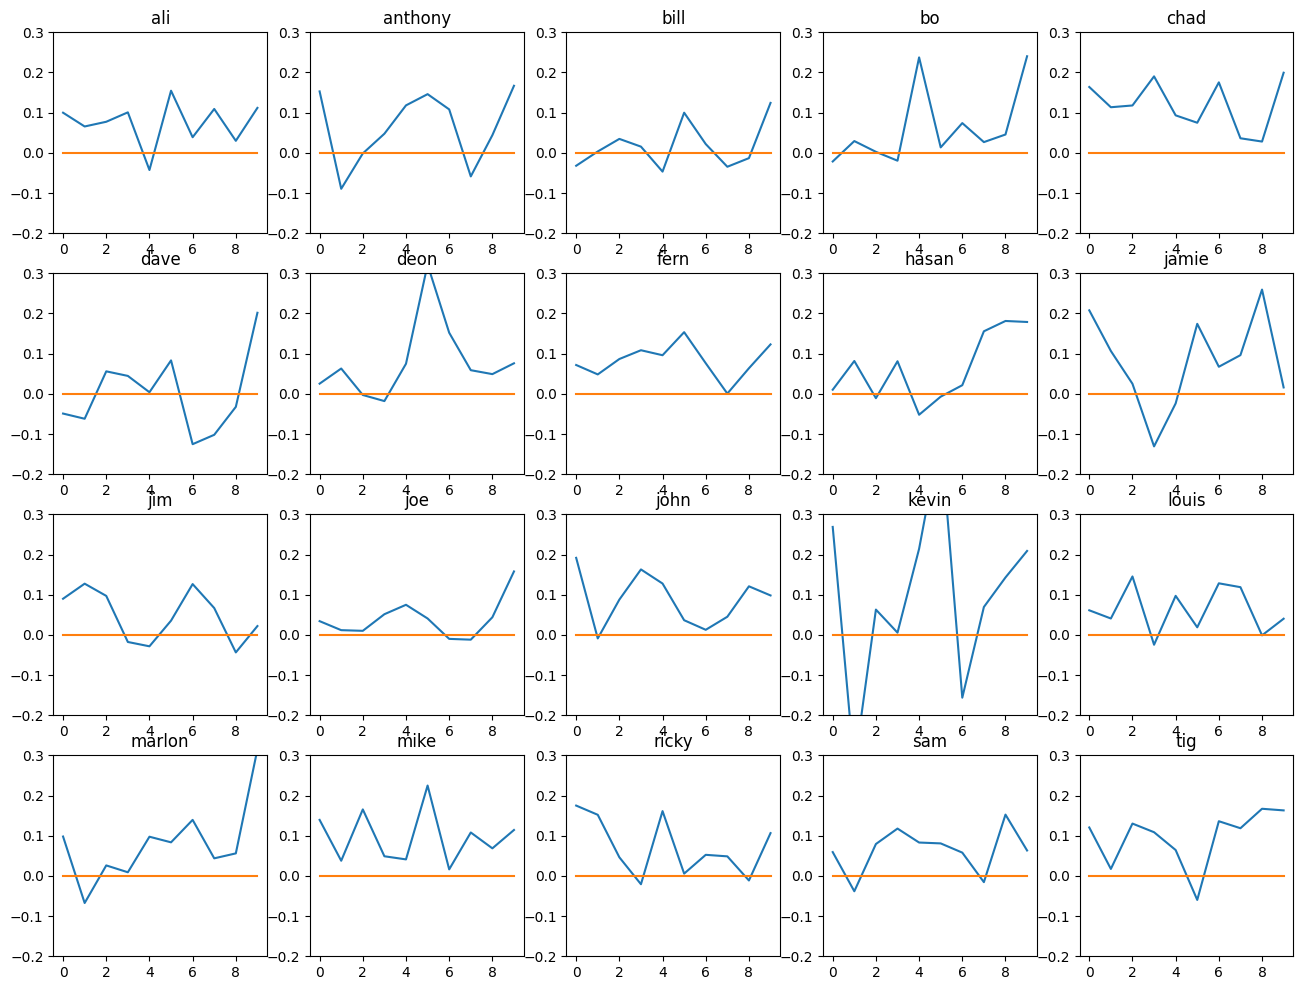

In [32]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(comedian)
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

for each comedian 
ali-almost always stays postive 
anthony- goes up and down regulary
bill- is pretty neutral
bo-his positivity goes up over time
chad-is probably the most positive
dave-swithces but has a lot of extremems at the end
deom-has a very big positive peak and always stays positiv
fern-remains constantly positive
jamie-has peaks and troughs but mostly positive
jim-mostly postive
joe-again mostly positive
john-alwyas positive
kevin-this is due to noise as the text was not extracted correctly
louis-again mostly remaine positiv
marlon- is neutral at first then increases then peaks at the end
mike- very positive throughout his performance
ricky-starts very positive and remains posivitive throughout
sam-starts neutral then becomes positive and gets very consistent scores
tig-begins positive,has a very big trough and ends on a more postiive note


## Additional Exercises

1. Modify the number of sections the comedy routine is split into and see how the charts over time change.

In [33]:
list_pieces2 = []
for t in data.transcript:
    split = split_text(t,20)
    list_pieces2.append(split)
    
list_pieces2

[['Ladies and gentlemen, please welcome to the stage:Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of theirmetabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautifulinner thigh clearancewhere they put their feet together and there’s that huge gap here with the light of potential just radiating through. And then, when they go to sleep, they just go to slee

In [34]:
polarity_transcript2 = []
for lp in list_pieces2:
    polarity_piece2 = []
    for p in lp:
        polarity_piece2.append(TextBlob(p).sentiment.polarity)
    polarity_transcript2.append(polarity_piece2)
    
polarity_transcript2

[[0.17054915514592933,
  0.018606701940035247,
  0.09570728291316528,
  0.03986111111111111,
  0.10789930555555556,
  0.04842158454290807,
  0.051546149323927135,
  0.14567901234567904,
  0.04074074074074074,
  -0.1156221198156682,
  0.11355957109537838,
  0.21357954545454547,
  0.03788510101010099,
  0.03954748376623378,
  0.11717796092796093,
  0.10416666666666664,
  0.0090353835978836,
  0.0598171768707483,
  0.013915701415701412,
  0.19285714285714278],
 [0.2783702002604442,
  0.03024505256648114,
  0.059337662337662335,
  -0.1782312925170068,
  -0.09593537414965986,
  0.13600363756613762,
  0.08819444444444446,
  0.014962121212121215,
  0.13023819273819273,
  0.103015873015873,
  0.0752281746031746,
  0.25677536231884057,
  -0.02687192118226601,
  0.29438775510204085,
  -0.06260642135642137,
  -0.0551328502415459,
  0.038607270865335386,
  0.04917842014616206,
  0.0475076855511638,
  0.24756652661064416],
 [0.016148951521291945,
  -0.08282186948853615,
  -0.003227908078654346,
  0

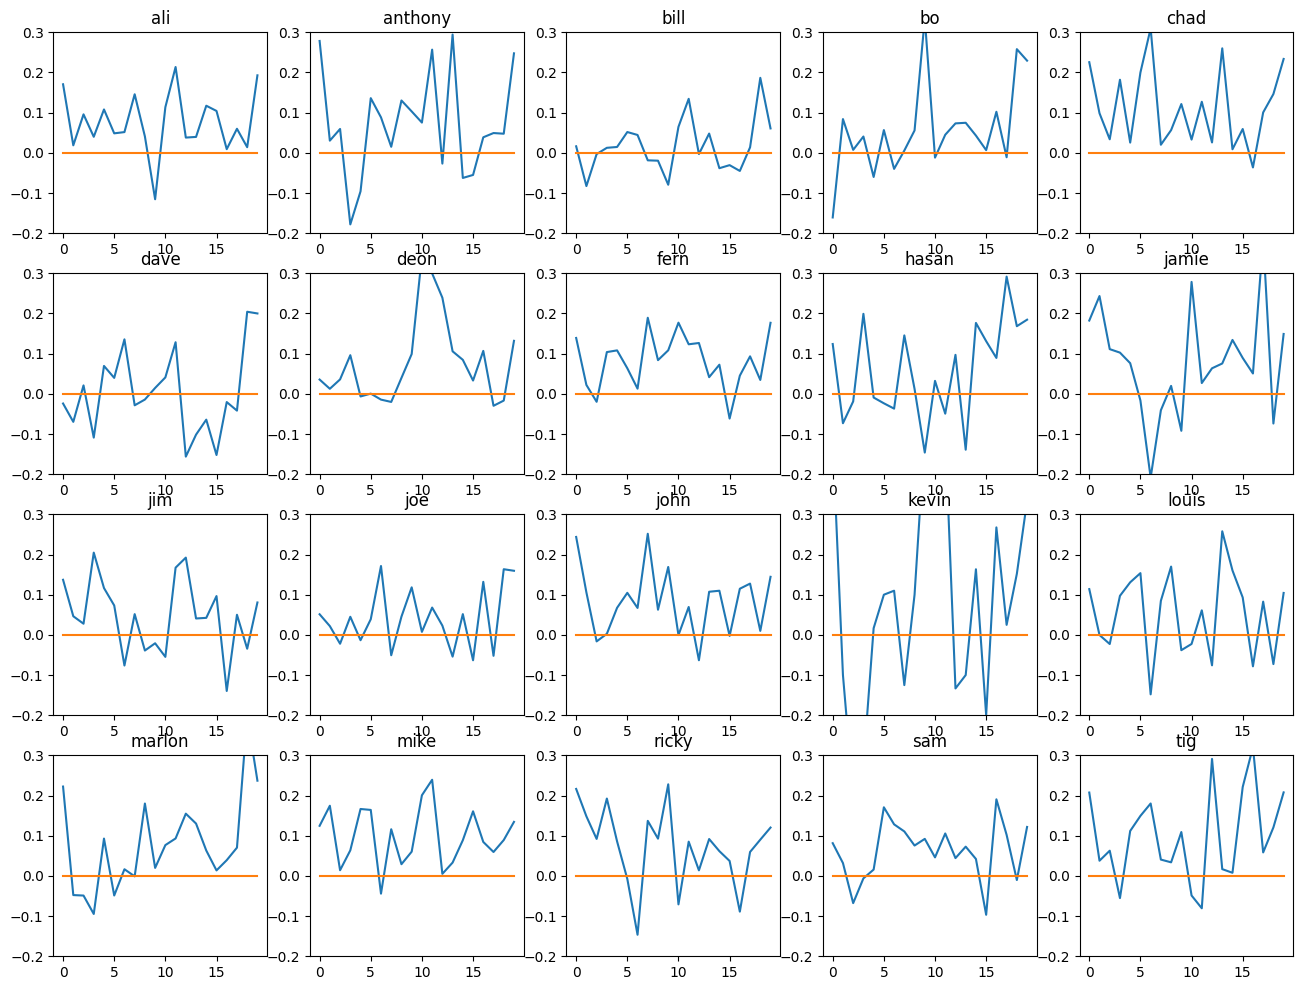

In [38]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 5, index+1)
    plt.plot(polarity_transcript2[index])
    plt.plot(np.arange(0,20), np.zeros(20))
    plt.title(comedian)
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

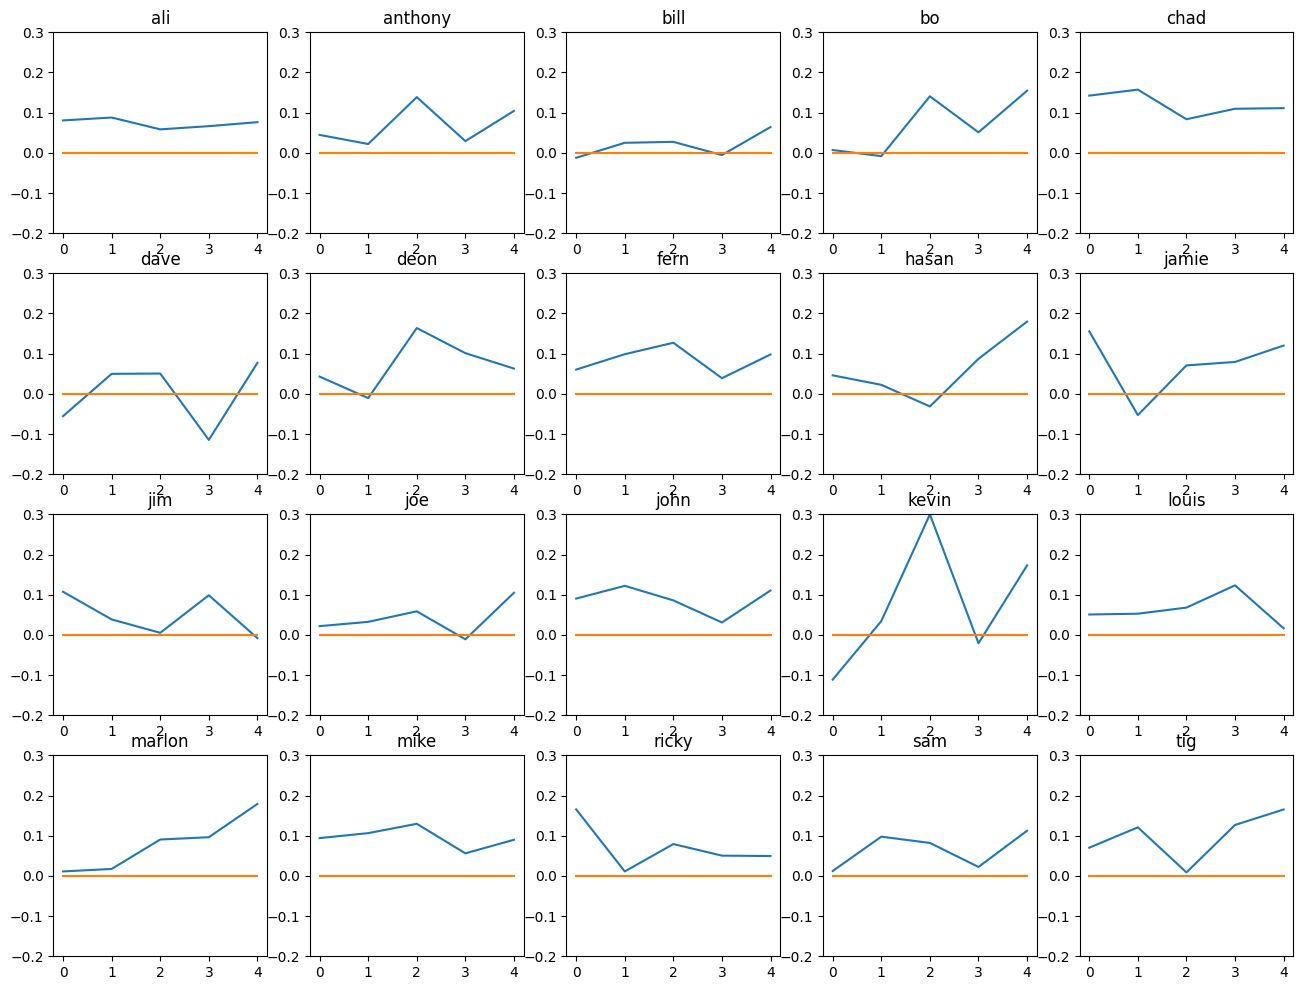

In [41]:
list_pieces3 = []
for t in data.transcript:
    split = split_text(t,5)
    list_pieces3.append(split)
    

polarity_transcript3 = []
for lp in list_pieces3:
    polarity_piece3 = []
    for p in lp:
        polarity_piece3.append(TextBlob(p).sentiment.polarity)
    polarity_transcript3.append(polarity_piece3)


plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 5, index+1)
    plt.plot(polarity_transcript3[index])
    plt.plot(np.arange(0,5), np.zeros(5))
    plt.title(comedian)
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()